In [3]:
"""
8. 선형회귀
    (1) [이론]
        - 경사하강법 : 회귀모델을 구현할 때 최초 회귀 계수를 임의의 값으로 설정한 후 경사하강법을 반보적으로 실행해 최소의 평균제곱오차를 가지는 회귀 계수(d)를 구함
            - 이를 공식으로 표현하면 d:= d - a *∂f(d)/∂d , f(d)는 평균제곱오차 
"""
# (2) [실습] 선형회귀 - 케라스로 구현

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#데이터 만들기
X = np.linspace(0,10,10) #0부터 10까지 총 10개의 X값

# np.arange(start, end, step=간격, dtype = 자료형) -> start~end-1 사이의 값을 간격만큼 띄어 배열로 반환
# np.linspace(start, end, num =개수, retsetp =False, dtype = 자료형) -> start~end사이의 값을 (동일한 간격을 지닌) 개수만큼 반환, retstep = True일 시 ([list], step)의 튜플로 반환

Y = X + np.random.randn(*X.shape) #Y값은 X에 임의의 수를 더한 값, randn() 에서 괄호값은 생성할 난수 개수, (10,)에서 10을 언패킹

#데이터 조회
for x, y in zip(X,Y):
    print((round(x,1), round(y,1)))

(0.0, 0.3)
(1.1, 0.8)
(2.2, 2.8)
(3.3, 3.2)
(4.4, 4.2)
(5.6, 6.0)
(6.7, 7.4)
(7.8, 9.3)
(8.9, 9.0)
(10.0, 10.3)


In [15]:
#선형회귀 모델 만들기
model = Sequential()
model.add(Dense(input_dim=1, units=1, activation='linear', use_bias = False)) #input_dim은 입력값의 차원, units는 y값의 차원, use_bias = False는 intercept 포함 안한다는 말

#모델 학습 방법 정의
sgd = optimizers.SGD(lr=0.01) # SGD는 경사하강법, lr은 학습률
model.compile(optimizer='sgd', loss='mse') #MSE를 줄이는 방법으로 학습

#학습 전 최초로 설정된 w값 조회
weights = model.layers[0].get_weights() #임의의 가중치 부여
w = weights[0][0][0]
print('initial w is :' + str(w))

initial w is :1.6978716


In [23]:
#선형 회귀 모델 학습
model.fit(X,Y, batch_size=10, epochs=10, verbose=1) #batch_size는 한번에 처리할 데이터개수, epochs는 반복학습 횟수

Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9268
Epoch 2/10
10/10 [==============================] - 0s 400us/step - loss: 0.9268
Epoch 3/10
10/10 [==============================] - 0s 300us/step - loss: 0.9268
Epoch 4/10
10/10 [==============================] - 0s 400us/step - loss: 0.9268
Epoch 5/10
10/10 [==============================] - 0s 400us/step - loss: 0.9268
Epoch 6/10
10/10 [==============================] - 0s 400us/step - loss: 0.9268
Epoch 7/10
10/10 [==============================] - 0s 200us/step - loss: 0.9268
Epoch 8/10
10/10 [==============================] - 0s 300us/step - loss: 0.9268
Epoch 9/10
10/10 [==============================] - 0s 300us/step - loss: 0.9268
Epoch 10/10
10/10 [==============================] - 0s 200us/step - loss: 0.9268


In [24]:
#학습된 기울기 조회
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('trained w is : ' + str(w))

trained w is : 1.0070312


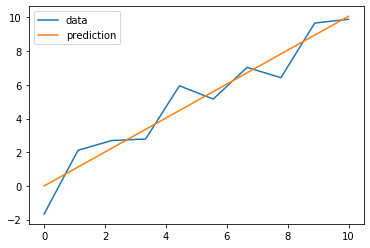

In [25]:
# 회귀선 시각화
plt.plot(X, Y, label='data')
plt.plot(X, w*X, label='prediction')
plt.legend()
plt.show()

In [5]:
"""
9. 로지스틱 회귀
    - (y값이 0 혹은 1로 이루어진 데이터를 추정한) 선형 회귀를 입력으로 받아 특정 레이블로 분류하는 모델
    
    (1)[이론] 로지스틱 회귀
        - wx + b 의 선형회귀를 시그모이드 함수로 입력 -> 시그모이드 값이 0.5 이하일 경우 거짓, 0.5보다 클 경우 참을 반납
        - 단일 입력, 다중입력, 다중분류 로지스틱 회귀(=소프트맥스)가 존재
        
        (i) 로지스틱 회귀 학습
            - 로지스틱 회귀 역시 경사하강법으로 최적이 w를 찾아내지만, 비용함수는 평균제곱오차가 아닌 크로스 엔트로피 이용 -> 비선형성을 지니고 있는 시그모이드 함수 때문
            
        (ii) 선형 vs 비선형
            - 시그모이드 함수 = 1 / (1+e^-y) = 1 / (1+e^-(w1x1 + w2x2 + w3x3...)) 로 비선형 함수
            - 함수가 선형일 경우 평균제곱오차 비용함수는 아래쪽으로 볼록하기 때문에 경사하강법으로 변곡점을 찾을 수 있음
            - 로지스틱 회귀의 평균제곱오차는 볼록한 모양이 아님 -> 크로스 엔트로피 사용
            
        (iii) 크로스 엔트로피
            - 크로스 엔트로피란 서로 다른 두 확률 분포의 차이, 로지스틱 회귀 관점에서는 모델의 예측값의 확률과 실제값 확률의 차이 -> 차이를 가장 작게하는 w를 구함으로써 최적의 w를 구함
            - 크로스 엔트로피 = -∑(p(x)*log{q(x)}) ; p(x)는 실제 데이터의 분포, q(x)는 모델의 예측값 분포
        
"""

#(2) [실습] 단일 입력 로지스틱 회귀
# 1개의 입력을 받아 0 또는 1을 출력하는 로지스틱 회귀 모델을 케라스로 구현

from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

#로지스틱 회귀 모델 만들기
model = Sequential()
model.add(Dense(input_dim=1,units=1)) #입력 1개를 받아 출력 1개를 리턴하는 선형 회귀 레이어 생성
model.add(Activation('sigmoid')) #선형 회귀의 출력값을 시그모이드에 연결
model.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics=['binary_accuracy']) #크로스 엔트로피를 비용함수로 설정해 경사하강법으로 학습

#데이터 생성
X = np.array([-2, -1.5, -1, 1.25, 1.62, 2])
Y = np.array([0,0,0,1,1,1])

#모델학습
model.fit(X,Y, epochs = 300, verbose=0) #300번의 반복학습 ; verbose 는 진행상황을 알려줌 0이면 silent, 1이면 progress bar, 2면 one line per epoch

#모델의 출력값 확인
model.predict([-2,-1.5,-1,1.25,1.62,2])

Epoch 1/300
6/6 [==============================] - 0s 64ms/step - loss: 0.3379 - binary_accuracy: 1.0000
Epoch 2/300
6/6 [==============================] - 0s 500us/step - loss: 0.3360 - binary_accuracy: 1.0000
Epoch 3/300
6/6 [==============================] - 0s 333us/step - loss: 0.3342 - binary_accuracy: 1.0000
Epoch 4/300
6/6 [==============================] - 0s 666us/step - loss: 0.3324 - binary_accuracy: 1.0000
Epoch 5/300
6/6 [==============================] - 0s 833us/step - loss: 0.3306 - binary_accuracy: 1.0000
Epoch 6/300
6/6 [==============================] - 0s 333us/step - loss: 0.3288 - binary_accuracy: 1.0000
Epoch 7/300
6/6 [==============================] - 0s 333us/step - loss: 0.3271 - binary_accuracy: 1.0000
Epoch 8/300
6/6 [==============================] - 0s 667us/step - loss: 0.3254 - binary_accuracy: 1.0000
Epoch 9/300
6/6 [==============================] - 0s 167us/step - loss: 0.3236 - binary_accuracy: 1.0000
Epoch 10/300
6/6 [=============================

Epoch 78/300
6/6 [==============================] - 0s 499us/step - loss: 0.2359 - binary_accuracy: 1.0000
Epoch 79/300
6/6 [==============================] - 0s 500us/step - loss: 0.2350 - binary_accuracy: 1.0000
Epoch 80/300
6/6 [==============================] - 0s 333us/step - loss: 0.2340 - binary_accuracy: 1.0000
Epoch 81/300
6/6 [==============================] - 0s 333us/step - loss: 0.2331 - binary_accuracy: 1.0000
Epoch 82/300
6/6 [==============================] - 0s 4ms/step - loss: 0.2322 - binary_accuracy: 1.0000
Epoch 83/300
6/6 [==============================] - 0s 333us/step - loss: 0.2313 - binary_accuracy: 1.0000
Epoch 84/300
6/6 [==============================] - 0s 666us/step - loss: 0.2304 - binary_accuracy: 1.0000
Epoch 85/300
6/6 [==============================] - 0s 334us/step - loss: 0.2295 - binary_accuracy: 1.0000
Epoch 86/300
6/6 [==============================] - 0s 333us/step - loss: 0.2286 - binary_accuracy: 1.0000
Epoch 87/300
6/6 [=====================

Epoch 155/300
6/6 [==============================] - 0s 500us/step - loss: 0.1802 - binary_accuracy: 1.0000
Epoch 156/300
6/6 [==============================] - 0s 333us/step - loss: 0.1796 - binary_accuracy: 1.0000
Epoch 157/300
6/6 [==============================] - 0s 500us/step - loss: 0.1791 - binary_accuracy: 1.0000
Epoch 158/300
6/6 [==============================] - 0s 333us/step - loss: 0.1785 - binary_accuracy: 1.0000
Epoch 159/300
6/6 [==============================] - 0s 333us/step - loss: 0.1780 - binary_accuracy: 1.0000
Epoch 160/300
6/6 [==============================] - 0s 333us/step - loss: 0.1774 - binary_accuracy: 1.0000
Epoch 161/300
6/6 [==============================] - 0s 333us/step - loss: 0.1769 - binary_accuracy: 1.0000
Epoch 162/300
6/6 [==============================] - 0s 167us/step - loss: 0.1764 - binary_accuracy: 1.0000
Epoch 163/300
6/6 [==============================] - 0s 333us/step - loss: 0.1758 - binary_accuracy: 1.0000
Epoch 164/300
6/6 [=========

Epoch 231/300
6/6 [==============================] - 0s 333us/step - loss: 0.1459 - binary_accuracy: 1.0000
Epoch 232/300
6/6 [==============================] - 0s 500us/step - loss: 0.1456 - binary_accuracy: 1.0000
Epoch 233/300
6/6 [==============================] - 0s 333us/step - loss: 0.1452 - binary_accuracy: 1.0000
Epoch 234/300
6/6 [==============================] - 0s 500us/step - loss: 0.1448 - binary_accuracy: 1.0000
Epoch 235/300
6/6 [==============================] - 0s 334us/step - loss: 0.1445 - binary_accuracy: 1.0000
Epoch 236/300
6/6 [==============================] - 0s 500us/step - loss: 0.1441 - binary_accuracy: 1.0000
Epoch 237/300
6/6 [==============================] - 0s 333us/step - loss: 0.1438 - binary_accuracy: 1.0000
Epoch 238/300
6/6 [==============================] - 0s 500us/step - loss: 0.1434 - binary_accuracy: 1.0000
Epoch 239/300
6/6 [==============================] - 0s 500us/step - loss: 0.1431 - binary_accuracy: 1.0000
Epoch 240/300
6/6 [=========

array([[0.05981579],
       [0.11178291],
       [0.1993265 ],
       [0.8427933 ],
       [0.89879894],
       [0.9371671 ]], dtype=float32)

In [4]:
#모델 요약
model.summary()
# dense_3이 선형회귀, activation_3이 시그모이드

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
#레이어에 존재하는 w와 b는 다음과 같이 확인
model.layers[0].weights

[<tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32_ref>]

In [9]:
#학습을 통해 구현한 w와 b는 get_weights() 함수로 확인
model.layers[0].get_weights()

[array([[1.1038953]], dtype=float32), array([-0.01740905], dtype=float32)]

In [10]:
#(3) [실습] 다중 입려 로지스틱 회귀
# AND 연산을 로지스틱 회귀로 구현

from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

#로지스틱 회귀 모델 만들기 - sigmoid(w1x1 + w2x2 + b) 형태를 띠는 간단한 로지스틱 회귀 구현
model = Sequential()
model.add(Dense(input_dim=2,units=1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['binary_accuracy'])


In [11]:
#학습 데이터 생성
X = np.array([(0,0), (0,1),(1,0),(1,1)])
Y = np.array([0,0,0,1])

#모델 학습
model.fit(X,Y, epochs = 500, verbose = 0)

#출력
model.predict(X)

array([[0.19605897],
       [0.40030167],
       [0.35892287],
       [0.6051236 ]], dtype=float32)

In [12]:
#모델 요약
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers[0].weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 1) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32_ref>]

In [14]:
model.layers[0].get_weights()

[array([[0.8310681],
        [1.0069021]], dtype=float32),
 array([-1.4111104], dtype=float32)]

In [15]:
# (4) [실습] 소프트맥스(다중분류 로지스틱 회귀)
# MNIST 손글씨 숫자 데이터 셋을 사용해 입력된 손글씨 숫자를 0부터 9까지 분류

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras.datasets import mnist

#데이터 획득
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [16]:
print("train data (count, row, column) : " + str(X_train.shape))
print("test data (count, row, column) : " + str(X_test.shape))

train data (count, row, column) : (60000, 28, 28)
test data (count, row, column) : (10000, 28, 28)


In [17]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
#데이터 정규화 -> 입력 값을 0부터 1의 값으로 변경
#정규화된 입력값은 경사하강법으로 모델을 학습할 떄 더욱 쉽고 빠르게 w*, b*를 찾게 도와줌
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
# y는 손글씨 데이터에 해당하는 숫자
print("train target (count) :" + str(y_train.shape))
print("test target (count) :" + str(y_test.shape))

train target (count) :(60000,)
test target (count) :(10000,)


In [20]:
print("sample from train :" + str(y_train[0])) #샘플 숫자 출력
print("sample from test :" + str(y_test[0]))

sample from train :5
sample from test :7


In [23]:
#데이터 단순화
input_dim = 784 #28 픽셀 x 28 픽셀
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)


In [25]:
#소프트 맥스
# 실제값과의 크로스 엔트로피를 계산하기 위해 실제값을 '원 핫 인코딩'으로 변환
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [27]:
print(y_train[0]) # 5였던 값이 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 로 변환

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [28]:
#케라스로 소프트맥스 구현
model = Sequential()
model.add(Dense(input_dim=input_dim, units=10,activation='softmax'))

In [30]:
#모델 학습
model.compile(optimizer = 'sgd', loss='categorical_crossentropy',metrics=['accuracy']) #10개의 클래스로 분류 -> categorical_crossentropy 사용
model.fit(X_train, y_train, batch_size=2048, epochs=100, verbose=0)

#모델 테스트
score = model.evaluate(X_test, y_test)
print('test accuracy:',score[1])

10000/10000 [==============================] - 1s 78us/step
test accuracy: 0.8902


In [31]:
#모델 요약
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.layers[0].weights

[<tf.Variable 'dense_5/kernel:0' shape=(784, 10) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(10,) dtype=float32_ref>]